In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RandomizedLasso,LassoLarsCV
from sklearn.exceptions import ConvergenceWarning 
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, accuracy_score, confusion_matrix
import sklearn.datasets 

from scipy.stats import skew

import seaborn as sns

In [30]:
sns.set()
%matplotlib inline

In [31]:
column_names = ["Sexo", "Largo", "Diametro", "Altura", "Peso completo", "Peso descascarado", "Peso Vísceras", "Peso cascaron", "Anillos"]
data = pd.read_csv("abalone.data", names=column_names)
print("Numero de datos: %d" % len(data))
data.head()

Numero de datos: 4177


,Sexo,Largo,Diametro,Altura,Peso completo,Peso descascarado,Peso Vísceras,Peso cascaron,Anillos
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [32]:
# Para evitar tener la variable categorica "Sexo", transformamos dicha variable en tres boleanos.
for label in "MFI":
    data[label] = data["Sexo"] == label
del data["Sexo"]

In [33]:
data.head()

,Largo,Diametro,Altura,Peso completo,Peso descascarado,Peso Vísceras,Peso cascaron,Anillos,M,F,I
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,True,False,False
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,True,False,False
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,False,True,False
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,True,False,False
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,False,False,True


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Largo              4177 non-null   float64
 1   Diametro           4177 non-null   float64
 2   Altura             4177 non-null   float64
 3   Peso completo      4177 non-null   float64
 4   Peso descascarado  4177 non-null   float64
 5   Peso Vísceras      4177 non-null   float64
 6   Peso cascaron      4177 non-null   float64
 7   Anillos            4177 non-null   int64  
 8   M                  4177 non-null   bool   
 9   F                  4177 non-null   bool   
 10  I                  4177 non-null   bool   
dtypes: bool(3), float64(7), int64(1)
memory usage: 273.4 KB


In [35]:
data.describe()

,Largo,Diametro,Altura,Peso completo,Peso descascarado,Peso Vísceras,Peso cascaron,Anillos
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


De esto podemos saber:

1)Ninguna variable tiene minimo igual a cero, expecto altura.
2)No todas se comportan de forma Normal(Mean = Median = Mode) pero se acercan a comportamiento Normal
3)Todas numericas, excepto sexo
4)Distinta escala para cada una

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe9c487f7d0>,
      dtype=object)

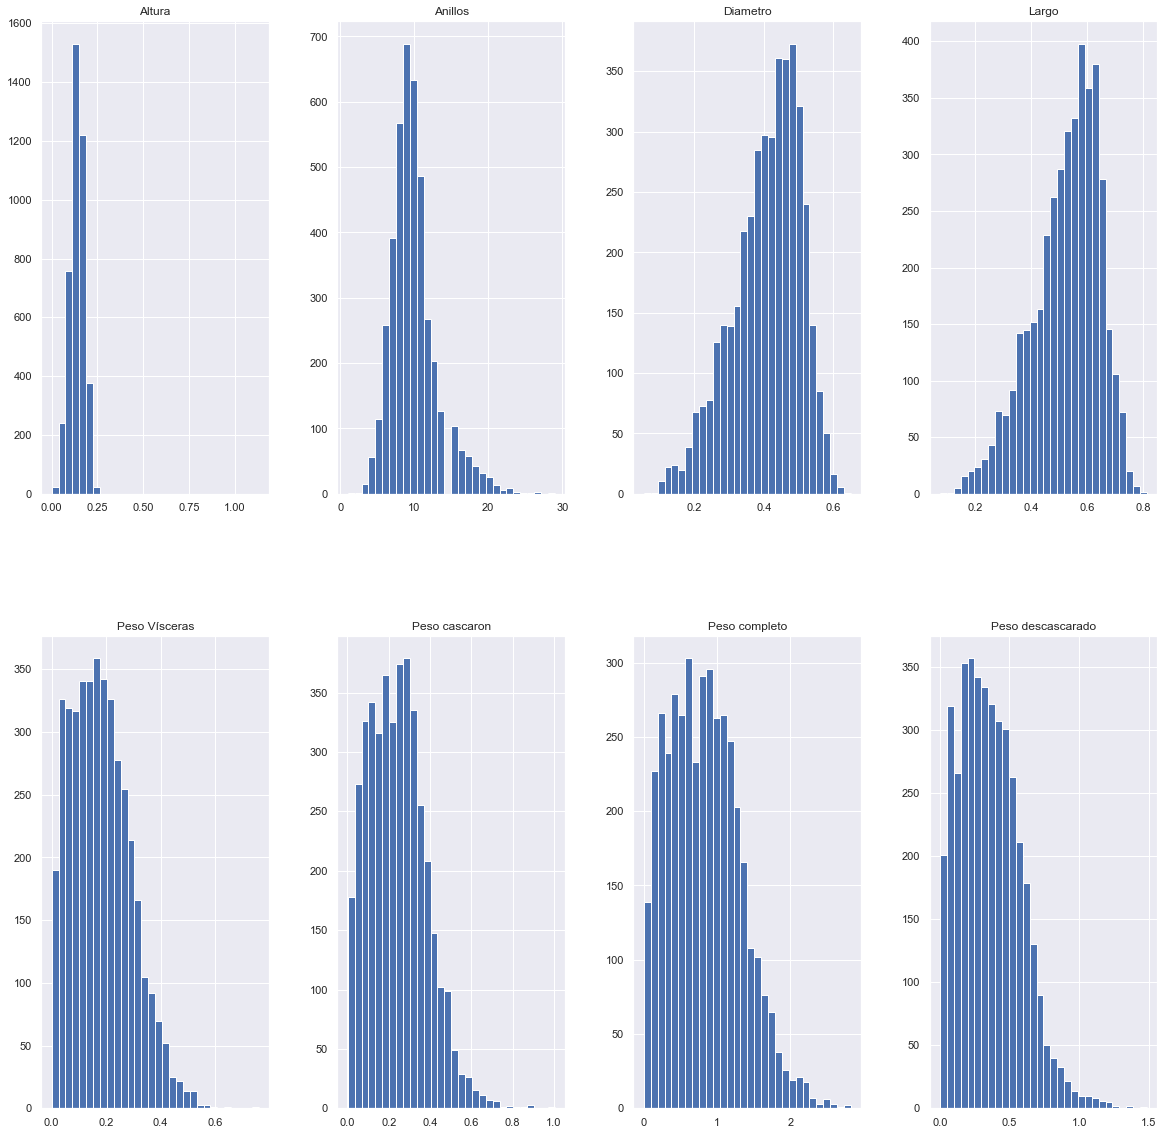

In [36]:
df = pd.read_csv("abalone.data", names=column_names)
df.hist(figsize=(20,20), grid = True, layout = (2,4), bins = 30)


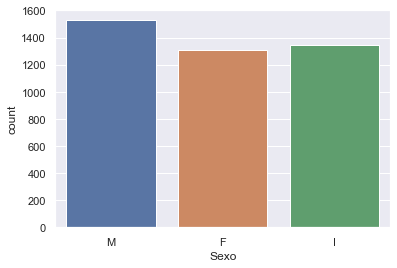

In [37]:
sns.countplot(x='Sexo', data = data_2)

In [38]:
'''Sexo'''
data_2 = pd.read_csv("abalone.data", names=column_names)

print("\nSexo en Porcentaje")
print(data_2.Sexo.value_counts(normalize = True))
print("\nSexo en Numeros")
print(data_2.Sexo.value_counts())


Sexo en Porcentaje
M    0.365813
I    0.321283
F    0.312904
Name: Sexo, dtype: float64

Sexo en Numeros
M    1528
I    1342
F    1307
Name: Sexo, dtype: int64


/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)

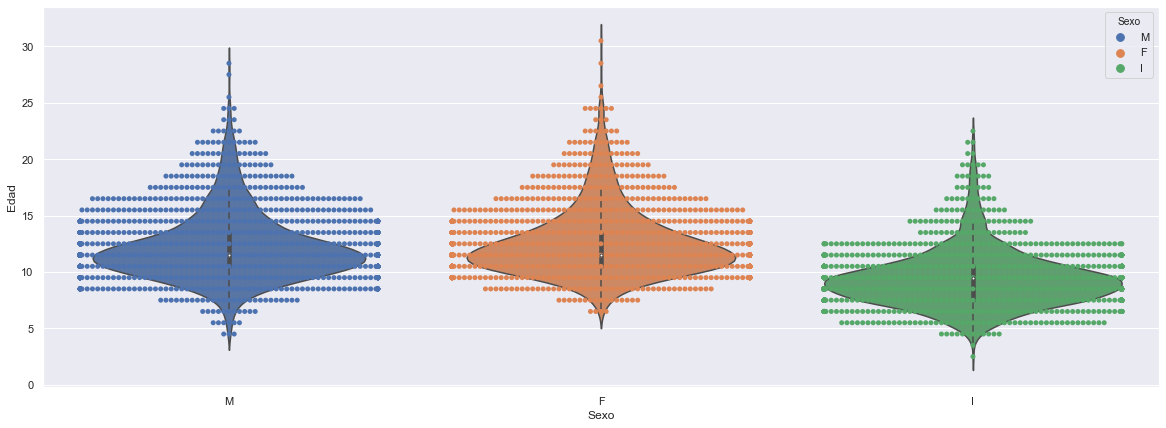

In [43]:

'''Sex and Age Visulization'''
data_2['Edad'] = data_2['Anillos'] + 1.5
plt.figure(figsize = (20,7))
sns.swarmplot(x = 'Sexo', y = 'Edad', data = data_2, hue = 'Sexo')
sns.violinplot(x = 'Sexo', y = 'Edad', data = data_2)

In [44]:
data_2.groupby('Sexo')[["Sexo", "Largo", "Diametro", "Altura", "Peso completo", "Peso descascarado", "Peso Vísceras", "Peso cascaron", "Anillos", "Edad"]].mean().sort_values(by = 'Edad',ascending = False)

,Largo,Diametro,Altura,Peso completo,Peso descascarado,Peso Vísceras,Peso cascaron,Anillos,Edad
Sexo,,,,,,,,,
F,0.579093,0.454732,0.158011,1.046532,0.446188,0.230689,0.302010,11.129304,12.629304
M,0.561391,0.439287,0.151381,0.991459,0.432946,0.215545,0.281969,10.705497,12.205497
I,0.427746,0.326494,0.107996,0.431363,0.191035,0.092010,0.128182,7.890462,9.390462
